
<center>

# TX Report - Spring 2024 
## Université de Technologie de Compiègne


## Survey on Machine Learning in Finance

### Ambroise THIBAULT - Computer sciences and engineering (GI05)

## Co-supervised by :
### **GILET Cyprien, Maître de conférences** - *UTC, Heudiasyc laboratory* 

### **GAYRAUD Ghislaine, Professeure des Universités** - *UTC, LMAC laboratory*
</center>


# Table of contents
1. [Introduction](#introduction)
2. [Mathematical approach of financial markets](#Mathematical-approach-of-financial-markets)
    1. [Elements of stochastic calculus](#Elements-of-stochastic-calculus)
    2. [Models definition, assets and portfolios](#Models-definition,-assets-and-portfolios)
    3. [Continuous time market models](#Continuous-time-market-model)
    4. [Black-Scholes model](#Black-Scholes-model)
3. [Pricing of financial derivatives](#Pricing-of-financial-derivatives,-contingent-claim)
    1. [General definition](#General-definition)
    2. [Forward contracts](#Forward-contracts)
    3. [Options contracts](#Options-contracts)
    4. [Pricing of options with the Black-Scholes formula](#Pricing-of-options-contracts)
    5. [Implementation of the Black-Scholes formula](#Implementation-of-the-Black-Scholes-formula)
4. [Options pricing with Machine Learning](#Options-pricing-with-Machine-Learning) 
    1. [Machine Learning in Finance](#Machine-Learning-in-Finance)
    1. [Dataset construction](#Dataset-construction)
    2. [Dataset exploration](#Dataset-exploration)
    3. [Formalization of the machine learning problem](#Formalization-of-the-machine-learning-problem)
    4. [Gaussian Process Regression](#Gaussian-process-regression)
    5. [Neural Networks](#Neural-Networks )
    6. [Multiple linear regression](#Multiple-Linear-Regression)
    7. [Comparaison of the methods](#Comparaison-of-the-methods)
5. [Conclusion](#Conclusion)
6. [References](#References)

# Introduction
This document aims to present the research project that I have conducted during the Spring 2024 semester at the Université de Technologie de Compiègne.
 This project was born out of a desire to study quantitative finance as part of my engineering education. To this end, I reached out Mr.Gilet and Mrs.Gayraud, who accepted to supervise me on this project.
I understand that usually it is the professors who propose the topics for such projects, so I am immensely grateful to Mr. Gilet and Mrs. Gayraud for giving me the opportunity to work on such a personalized subject. Moreover, I would like to thank them for giving me the freedom to choose the tools and methods that I wanted to use for this project. Considering my background and specialization in computer science with a focus on Data Science, we decided to build the subject around the use of Machine Learning in the field of quantitative finance. The main goal of this project was to understand how Machine Learning is used in quantitative finance and to present this use in a clear and pedagogical way. We chose to write the report in a notebook format to make it more interactive and present the results in a more pedagogical way. Python being the most used language in the field of Data Science, we decided to use it for this project. Some parts of the code are located in python scripts and available in the repository of this project that can be found [here](
    https://github.com/AmbroiseTHIBAULT/survey-ML-finance).

After analysing the state of the art, we decided to focus on the pricing of financial derivatives. This subject is one of the key topics in finance and one the first studied in quantitative finance courses. The first solutions to this problem were proposed based on the stochastic calculus theory. Nevertheless, this old method has some limitations and in the last decade, the growth of Machine Learning has led to the development of new ways to solve this problem. In order to compare the use of Machine Learning and historical method, we will first present the mathematical approach of financial markets, then we will present the pricing of financial derivatives with the well known Black-Scholes formula and finally we will present and implement the use of Machine Learning in this field using three different methods.


# Mathematical approach of financial markets 
The field of quantitative finance is based on the tools given by the stochastic calculus theory. This theory aims to model processes that evolve randomly over time. Intuitively, we can see the financial markets as such processes. As the market efficiency hypothesis of financial markets states that, all investors, having the same information and all wanted to do the best investment, it is impossible to predict the evolution of the market, showing the random aspect of it. In this section, we will first present the main elements of the stochastic calculus theory, used in quantitative finance. Then we will see how these elements are used to model an asset (a stock, a bond, etc.), a portfolio (a set of assets), a financial market. We will finally present the well known Black-Scholes model which is the simplest model to describe the evolution of an asset in a market.

## Elements of stochastic calculus


### Stochastic processes
The stochastic calculus is based on the concept of stochastic process. A stochastic process is a collection of random variables indexed by time. Formally, it is a mathematical object $X$ such that : 
$$
X = (\Omega, \mathcal{F},(\mathcal{F_t})_{t\in T}, (X_t)_{t \in T}, \mathbb{P})
$$
With : 
- A set of time $T$, usually $T = \mathbb{R}^+$
- ($\Omega, \mathcal{F}, \mathbb{P}$) a probability space
- $(\mathcal{F_t})_{t\in T}$ a filtration, an increasing family of sub-$\sigma$-algebras of $\mathcal{F}$, such that $\forall s \leq t$, $\mathcal{F_s} \subset \mathcal{F_t} \subset \mathcal{F}$. 
 It represents the information available at time $t$
- $(X_t)_{t \in T}$ a family of random variables

We can also see a stochastic process as a function of two variables : 
$$
X : \Omega \times T \rightarrow (E, \mathcal{E})
$$
We say that $X$ is adapted to the filtration $(\mathcal{F_t})_{t\in T}$ if $\forall t \in T$, $X_t$ is $\mathcal{F_t}$-measurable.

In the context of quantitative finance, $X$ represents the evolution of an asset, a portfolio...

### The brownian motion

The most important stochastic process in quantitative finance is the Brownian motion, also called Wiener process. 

$W = (\Omega, \mathcal{F},(\mathcal{F_t})_{t\in T}, (W_t)_{t \in T}, \mathbb{P})$ is a Brownian motion if :
- $W_0 = 0 $ a.s.
- $W_t - W_s \sim \mathcal{N}(0, t-s) \quad \forall s \leq t$
- $W_t - W_s \perp \mathcal{F_s} \quad \forall s \leq t$

We can remark the following properties of the Brownian motion :
- The brownian motion is a continuous process, the trajectories ($\omega$ fixed) are continuous functions of time (but they are not differentiable)
- $W_t \sim \mathcal{N}(0, t)$
- $\forall t_1 < t_2 < ... < t_n$, the increments $(W_{t_1}, W_{t_2} - W_{t_1}, ..., W_{t_n} - W_{t_{n-1}})$ are independent.

### Stochastic integral

As we will study the differential and integral forms of stochastic processes, we need to define the stochastic integral. So our goal is to define the integral of a stochastic process with respect to the Brownian motion, i.e $\int_0^T X_s dW_s$.

In the case of an elementary process $X$ defined as :
$$
X_t(\omega) = \sum_{k=0}^{n-1} X_k(\omega) \mathbb{1}_{[t_k, t_{k+1}[}(t)
$$
With $\left \{t_k \right \}$ a partition of $[0,T]$ such that  $0 = t_0 < t_1 < ... < t_n = T$

We have : 
$$
\int_0^T X_t dW_t = \sum_{k=0}^{n-1} X_k(W_{t_{k+1}} - W_{t_k})
$$
With $X_k$ a $\mathcal{F}_{t_k}$-measurable random variable.

Now we are able to define the stochastic integral for a general process $X$ as the limit of the integral of the elementary processes. Such that, we approach $X$ with a sequence of elementary processes $X_n$ such that : 
$$
 X_n \underset{L_2(\Omega)} \longrightarrow X \Leftrightarrow \mathbb{E}[\int_{0}^{T}|X_n(t)-X(t)|^2dt]\underset{n\rightarrow+\infty} \longrightarrow 0
$$

And we define the stochastic integral as :
$$
\int_{0}^{T}X_t dW_t = \lim_{n\rightarrow +\infty}\int_{0}^{T}X_n(t)dW_t
$$

### Itô's processes

Futhermore, we will consider financial stochastic processes as Itô processes. We say that $X$ is an Itô processes if there exists two processes $\mu$ and $\sigma$ such that :
- $\int_{0}^{T}|\mu_t|dt < +\infty$
- $\int_{0}^{T}|\sigma_t|^2dt < +\infty$
- $X_t - X_0 = \int_{0}^{t}\mu_sd_s + \int_{0}^{t}\sigma_sdW_s \quad \forall t \in [0,T]$

We denote the stochastic differential of $X$ as $dX_t = \mu_tdt + \sigma_tdW_t$

### Itô's formula

We are now able to define one of the most important result of stochastic calculus, the Itô's formula. It gives the differential of a function of an Itô process. Let : 
- $X$ an Itô process such that $dX_t = \mu_tdt + \sigma_tdW_t$
- $f:\mathbb{R}_+ \times \mathbb{R} \rightarrow \mathbb{R}$, $\mathcal{C}^1$ in $t$ and $\mathcal{C}^2$ in $x$

Then $Y_t = f(t,X_t)$ is an Itô process and its differential is given by :
$$ dY_t = \left ( \frac{\partial f(t,X_t)}{\partial t} + \frac{\partial f(t,X_t)}{\partial x}\mu_t + \frac{1}{2}\frac{\partial^2 f(t,X_t)}{\partial x^2}\sigma_t^2\right )dt + \frac{\partial f(t,X_t)}{\partial x}\sigma_t dW_t  $$

### Stochastic differential equations

As we study stochastic processes, we will deal with stochastic differential equations and more specifically with the geometric Brownian motion.

The general form of a stochastic differential equation is : 
$$\left\{\begin{matrix}
        dX_t = \mu(t,X_t)dt + \sigma(t,X_t)dW_t\\ 
        X_0 = \eta \sim \mathcal{L(\eta)}
        \end{matrix}\right.$$
With
- $\mathcal{L(\eta)}$ the law of $\eta$
- $\mu : [0,T]\times\mathbb{R}\rightarrow\mathbb{R}$
- $\sigma : [0,T]\times\mathbb{R}\rightarrow\mathbb{R}$
- $\mu$ et $\sigma$ are deterministic and measurable functions

We are interest in the geometric Brownian motion which is a solution of the following stochastic differential equation, were $\mu$ and $\sigma$ are constants :
$$\left\{\begin{matrix}
    dX_t = \mu X_t dt + \sigma X_t dW_t\\ 
    X_0 = x \in \mathbb{R}
    \end{matrix}\right.$$
The solution of this equation is given by :
$$X_t = x e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$$ 

We now have all the tools from the stochastic calculus theory to model financial markets.

## Models definition, assets and portfolios

### Assets and portfolio
A model, in the context of quantitative finance, is a mathematical representation of the evolution of an asset, a portfolio... In our case, we will focus on the evolution of an asset. 

We we use a model with two type of assets : 
- Risky asset : a stock denoted by $S$
- Risk free asset : a bond, a bank account (the french *Livret A*) ... denoted $B$ with a short interest rate $r$


We can use these assets to build a portfolio $h(x,y)$ where $x$ is the number of risk free asset and $y$ is the number of risky asset. 
The value of the portfolio at time $t$ is : 
$$ V_t^h = xB_t + yS_t$$

By misuse of language, we say that $B$ represent the bond and $S$ the stock but to be exact, $B$ and $S$ are price process of a bond and a stock. So $B_t$ and $S_t$ are respectively the bond price at time $t$ and the stock price at time $t$

## Continuous time market model
In the general case, we consider a family of assets : $\left\{S_t^i\right\} _{t\geq0}$ 

Where : 
- $S^o = B$ is the risk free asset
- $ S^i \quad i=1,...,N$ are risky assets

The risk free asset price has the following dynamic : 
$$ dB_t = r_tB_tdt $$

And the risky asset price has the dynamic : 
$$ dS_t^i = S_t^i \mu_t^i + S_t^i\sigma_t^idW_t^{\mathbb{P}, i}$$
Where $\mu_t^i$ is the local rate of return and $\sigma_t^i$ the volatility of the risky asset $i$ at time $t$

## Black-Scholes model

As it was said before, the simplest and the most famous model is the Black-Scholes model. This model is based on the following assumptions :
- The market is complete (all assets are tradable)
- No transaction costs, no taxes
- The market is continuous (no jumps in the prices)
- The market is arbitrage free (no possibility to make a riskless profit : $V_0^h = 0$ and $V_t^h \geq 0$)



The Black-Scholes model is a priori market model where we only have two assets : $B$ and $S$ with the following dynamics : 
$$dB_t = rB_tdt$$
$$dS_t = \mu S_t dt + \sigma S_tdW_t^{\mathbb{P}}$$

Where $\mu$ is the expected rate of return  and $\sigma$ the volatility of the asset, are two constants. It is a big assumption to consider that the rate of return and the volatility are constants. In reality, they are functions of time and it is not really realistic to consider for instance the volatility of an asset constant for several months. 


# Pricing of financial derivatives, contingent claim

As it has been said in the introduction, our goal is to study the pricing (finding the "good" price) of a financial derivative. In this section, we will first define what is a financial derivative, and then we will present the two simplest types of derivatives : forward contracts and options contracts. We will use a concrete example to understand these contracts. Finally, we will present the Black-Scholes formula which is a fully deterministic formula to price options contracts.
## General definition
A derivative, or contingent claim can be defined as a financial instrument whose value depends on (or derives from) the values of other, more basic, underlying variables. Very often the variables underlying derivatives are the prices of traded assets. An option, for example, is a derivative whose value is dependent on the price of a stock. However, derivatives can be dependent on almost any variable, from the price of a barrel of oil to the amount of snow falling at a certain ski resort.

In our case, the underlying asset will be the risky asset $S$ and we will denote $\mathcal{X}$ the contingent claim where the time to the maturity of the contract is denoted $T$. It means that at time $T$ it will be possible to determine the amount of money to be paid out. And this price is determine by the contract function $\Phi$ such that : 
$$ \mathcal{X} = \Phi(S(T))$$
It means that at time $T$ the holder of the contract will obtain $\mathcal{X}$ $,€... 

Our goal is to determine a "fair" price for this contract. This price of $\mathcal{X}$ at time $t$ is denoted 
$$\Pi(t;\mathcal{X})$$

## Forward contracts 

The simplest contract is the so called *forward contract*. It is an agreement between two parties to buy or sell an asset at 
- a certain futur time, called the *maturity* $T$
- a certain price, called the *strike* $K$

In function of wich side of the contract we take, we will be able to represent the profit or loss derived from this contract. This is called the *payoff*

One of the parties to a forward contract assumes a *long position* and agrees to buy the underlying asset on the certain specified future date for the certain specified price. The other party assumes a *short position* and agrees to sell the asset on the same date for the same price.

To illustrate this contract, lets consider two parties : 
- A baker
- A seller of flour : mills, wholesaler...

Lets take the side of the baker. He wants to protect himself from the flour price fluctuation in 6 months. One possibility is to use a forward contract.

Suppose that the current sprice (*spot price*) of the ton of flour costs 100€. 

Suppose that the baker wants to buy the ton of flour at the current price : 100€, in 6 months. To do so, the baker will meet a wholesaler to create a forward contract where the baker will be in a short position and the wholesaler in a long position. The strike of this contract will be $K = 100$ and the maturity $T = 0.5$. Moreover, $S_t$ represents the price of the ton of flour at the time $t$. So in 6 months, the baker will have the obligation to buy 1 ton of flour to the wholesaler at 100€, respectively, the wholesaler will have to provide a ton of flour at the price of 100€. 

Now, suppose that in 6 months, the ton of flour is now worth 110€. In this case, the wholesaler has to pay 110€ the ton of flour in the market and to sell it at the price of 100€ to the baker. Finally, the wholesaler has a loss of $110 - 100 = 10$€ and the baker a profit of $10$.
Instead, if the ton of flour falls at the price of 80€, then the baker has the obligation to buy it at 100€ to the wholesaler who buy it at 80€. Here the wholesaler makes a profit of 20€ whereas the baker loses 20€. 

Formally, the payoff from a long position (buyer side) in a forward contract on one unit of an asset is : 
$$S_T - K$$ 
where $K$ is the delivery price (strike) and $S_T$ the spot price of the underlying asset $S$ at the maturity $T$

Similarly, the payoff from a short position in a forward contract on one unit of an asset is
$$K-S_T$$

Theses payoffs can be positive or negative, they are illustrated in the figure below : 

<p align="center">
  <img src="../images/forward_payoffs.png" width="80%">
</p>

## Options contracts

In the above example we can clearly see a problem for the baker : he has the obligation to buy at the determined price $K$, even if it is no advantageous for him ($K>S_T$). So the baker would want not to use the contract if it is not advantageous for him and instead, buy the ton of flour at the market price $S_T$.

So one solution would be to, instead of having the **obligation**, the owner / buyer of the contrat has the **right** to buy at the predetermined price $K$. 

This type of contract exists and is called an **option**


There are two types of option. A call option gives the holder the right to buy the underlying asset by a certain date for a certain price. A put option gives the holder the right to sell the underlying asset by a certain date for a certain price. This price in the contract is known as the strike price $K$ and the date in the contract is known as the expiration date or maturity $T$.

It should be emphasized that an option gives the holder the right to do something. The holder does not have to exercise this right. This is what distinguishes options from forwards contracts, where the holder is obligated to buy or sell the underlying asset. Whereas it costs nothing to enter into a forward or futures contract, there is a cost to acquiring an option. We can denote this price as $$\Pi(t;\mathcal{X})$$ where $\mathcal{X}$ is a call or a put options.

In general we will be interested in the price of the contract a $t=0$ : $\Pi(0;\mathcal{X})$

Now lets take again the example above. Suppose that the price to enter the contract for the baker is 5€, i.e $\Pi(0;\mathcal{X}) = 5$. 

In the case that in 6 months, the price of the ton of flour is 110€, it would be advantageous to exercice the option and so the payoff would $110-100 = 10$€ and the net profit (taking in account the price to enter the contract) would be $(110 - 100) -5 = 5$ €

Now if the price falls to 90€, then the baker would prefer to buy the ton of flour at the market price rather than exercice the option and pay 100€. So the payoff would be 0€ and the net profit would be -5€ (the price he paid for the option he doesn't use)


Formally, the payoff from a long position (buyer side) in a call option on one unit of an asset is : 
$$\Phi({S(T)}) = \left\{\begin{matrix}
    S_T - K \quad \text{if} \quad S_T > K\\
    0 \quad \text{otherwise}
    
\end{matrix}\right.$$

This example is illustrated in the figure below : 
<p align="center">
  <img src="../images/call_options.png" width="60%">
</p>

Similarly the payoff function of long position in a put option is 
$$\Phi({S(T)}) = \left\{\begin{matrix}
    K - S_T \quad \text{if} \quad S_T < K\\
    0 \quad \text{otherwise}
    
\end{matrix}\right.$$

<p align="center">
  <img src="../images/put_options.png" width="60%">
</p>


## Pricing of options contracts

Now the main question is : what price should we give to an option ? 

More generally, the question is : how to determine the price of a financial derivative, a contingent claim of the form : $\mathcal{X} = \Phi(S(T))$ ?

Formally, we want to find the price function $\Pi(t;\mathcal{X}) = F(t,S_t)$

### Black-Scholes-Merton equation

In 1997, Fischer Black, Myron Scholes and Robert Merton won the Nobel Prize in Economics for their work on this price function. As a result, they gave one of the most famous Partial Differential Equation : the Black-Scholes-Merton equation.
This PDE is part of a theorem that states the following :
If the market is given by the Black-Scholes model, and follows the assumptions of it, if the contingent claim $\mathcal{X}$ we want to price is of the form $\mathcal{X} = \Phi(S(T))$, then the only pricing function $F(t,S_t) = \Pi(t)$ is the solution of the Black-Scholes-Merton equation : 

$$
    \frac{\partial F(t,s)}{\partial t} + \frac{1}{2}\sigma^2 s^2 \frac{\partial^2 F(t,s)}{\partial s^2} + r s \frac{\partial F(t,s)}{\partial s} - r F(t,s) = 0

$$

With the following boundary conditions : $F(T,s) = \Phi(s)$

The proof of this theorem is based on the application of the Itô's formula to the function $F(t,S_t)$
This proof is fully detailed in the section 3 - *The Black-Scholes Equation* of the chapter 7 of the textbook "Arbitrage Theory in Continuous Time" by Tomas Björk, third edition.

### Risk neutral valuation formula

Another tool to find the price function $F$ is the risk neutral valuation formula. This formula gives us a deterministic formula to find the price of a financial derivative.

We first remark that the B-S-M equation is independant of $\mu$. We can interpret this by saying that investors are neutral against the risk. Indeed, expected rate of return is the only variable affected by the risk aversion of the investors. The difference between the volatility and the expected rate of return is that the volatility is not independant of the stock price. And the stock price is supposed to be balanced (efficiency) and as the stock price is determined by investors choices, it is function fo their aversion to the risk. So it is the stock price that takes in account the aversion to the risk. For the expected rate of return, the higher the aversion is, the more the investor will require a high return. 

So if the aversion of risk do not appears in the the B-S-M equation, it means that it does not affect the solution. So we can chose any level of risk aversion. In particular, we can say that investors are neutral against the risk. In this case, in a risk neutral world, the expected rate of return is equal to risk-free interest rate : $\mu = r$ 


We can now define the asset $S$ under a new probability measure : 
$$dS_t = r S_tdt + \sigma S_t dW^{\mathbb{Q}}_t$$

where $\mathbb{Q}$ is the risk neutral probability measure. 

It is important to note that this SDE is of precissely the same form as the SDE defining the Black-Scholes model. The only, but important change is that whereas in the Black-Scholes model, $S$ has the local rate of return $\mu$, in the risk neutral world, $S$ has the short rate of interest $r$ as its local rate of return.

This is the reason why we have two probabilities measures. The *objective* probability measure $\mathbb{P}$, which is the real world probability measure, and the *risk neutral* probability measure $\mathbb{Q}$, which is a probability measure under which the expected rate of return of the stock is the risk-free interest rate.

By applying Itô formula to $e^{-rt}F(t,S_t)$, we obtain risk neutral valuation formula : 

$$F(t,S_0) = e^{-r(T-t)}\mathbb{E}^\mathbb{Q}[\Phi(S(T))]$$

The proof of the risk neutral valuation formula is given in the section 4 - The *Risk Neutral Valuation* of the chapter 7 of the textbook "Arbitrage Theory in Continuous Time" by Tomas Björk, third edition.

For a call option, we now have to apply this formula with : 
$\Phi({S(T)}) = \left\{\begin{matrix}
    S_T - K \quad \text{if} \quad S_T > K\\
    0 \quad \text{otherwise}
\end{matrix}\right.$ 



And we find the Black-Scholes formula for call option : 
$$F_c(t,S_0) = S_0\mathcal{N}(d_1) - Ke^{-r(T-t)}\mathcal{N}(d_2)$$

With : 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T-t)\right]$$
$$d_2 = d_1 - \sigma\sqrt{T-t}$$

Similarly, we find the pricing function of a put option : 
$$F_p(t,S_0) = Ke^{-r(T-t)}\mathcal{N}(-d_2) - S_0\mathcal{N}(-d_1)$$

The details of the computations are given in the section 5 - *The Black-Scholes Formula* of the chapter 7 of the textbook "Arbitrage Theory in Continuous Time" by Tomas Björk, third edition.

### The greeks

The greeks represent the sensitivity of the price of an option with respect to some parameters (the underlying $S$, the volatility $\sigma$, the risk free interest rate : $r$...). The main greeks are :
- Delta, the sensitivity of the price of the option with respect to the underlying $S$ : $\Delta = \frac{\partial F}{\partial S}$
- Gamma, the sensitivity of the delta with respect to the underlying $S$ : $\Gamma = \frac{\partial^2 F}{\partial S^2}$
- Vega, the sensitivity of the price of the option with respect to the volatility $\sigma$ : $\nu = \frac{\partial F}{\partial \sigma}$


### Pricing the example of the Baker

In our exemple, the current price of the ton of flour is 100€ so $S_0=100$ and want the baker wants to have the option to buy it in 6 months at 100€. So the maturity is 0.5 years, $T=0.5$ and the strike is 100€, $K=100$. Now lets suppose that the volatility of the ton of flour is $20\%$ : $\sigma = 0.2$ and the risk-free interest rate is the *livret A* interest rate : $3\%$ so $r=0.03$

The actual price of this option, denoted $\Pi_f(0)$ is : 
$$\Pi_f(0) = F_c(0,100) = 100\mathcal{N}(d_1) - 100e^{-0.04(0.5-0)}\mathcal{N}(d_2)$$
With : 
$$d_1 = \frac{1}{0.2\sqrt{0.5-0}}\left[\ln\left(\frac{100}{100}\right) + \left(0.04 + \frac{0.2^2}{2}\right)(0.5-0)\right] \approx 0.212$$
$$d_2 = d_1 - 0.2\sqrt{0.5-0} \approx 0.0707$$

Finally $$\Pi_f(0) \approx 6.65$$
So the price of our the call option, i.e the price to enter the contract, under the Black-Scholes model is approximately 6.65€

## Implementation of the Black-Scholes formula

In this section, we will implement and comment the Black-Scholes formula for call and put options. To do so we will implement the baker example. 

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, shapiro
import statsmodels.api as sm
from sklearn.feature_selection import f_regression

# Import libraries from local scripts
chemin_dev = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if chemin_dev not in sys.path:
    sys.path.append(chemin_dev)
from options_pricing.scripts import black_scholes as bs
from options_pricing.scripts import data_processing as dp
from options_pricing.scripts import model_evaluation as me
from options_pricing.scripts import linear_reg as lr
from options_pricing.scripts import model_training as mt

The following cell defines the functions to compute the price of a call and a put option using the Black-Scholes formula. It is simply the implementation of the formulas given above, in Python.

In [2]:
def bs_options_pricing(S, K, r, T, sigma, option_type='c'):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    if option_type == 'c':
        option_price = S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    elif option_type == 'p':
        option_price = K*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
    return option_price

We initialize the parameters of the model, in the case of the baker example

In [3]:
r = 0.03
S1= 100
K = 100
sigma = 0.2
T = 0.5

In [4]:
print(f'Call option price for the baker example: {round(bs_options_pricing(S1, K, r, T, sigma, option_type="c"), 2)}€')

Call option price for the baker example: 6.37€


Considering the round perform during the hand-computation, we can say that the results are coherents

In order to vizualise the randomness of the stock price, we will simulate the stock price with the Black-Scholes model and plot the results.
We recall that the risky asset follow the following SDE :
$$\left\{\begin{matrix}
    dS_t = \mu S_t dt + \sigma S_t dW_t\\ 
    S_0 \in \mathbb{R}
    \end{matrix}\right.$$
   That has for solution : $$S_t = S_0 e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}$$ 

Moreover, we know that the brownian motion has the following propertie :
$W_t - W_s \sim \mathcal{N}(0,t-s)$ 
So for a stock price at time 0 of 100€, a volatility of 20% and an expected rate of return of 4%, we can simulate the stock price for a period of one year with the following code : 

```python

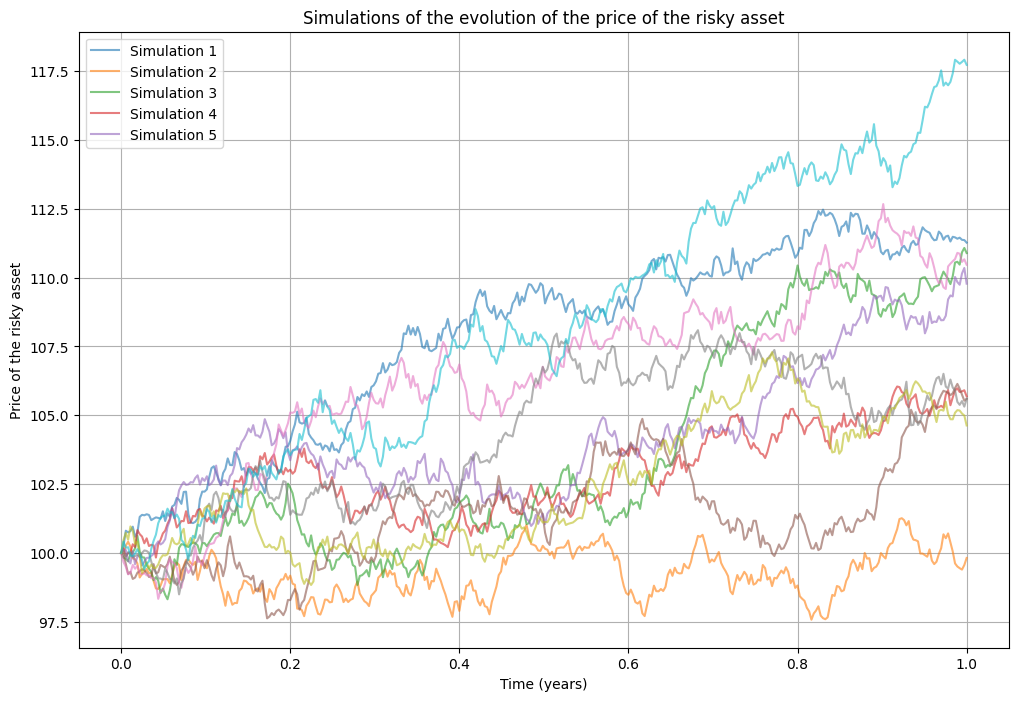

In [5]:
S0_sim = 100  
mu_sim = 0.1
sigma_sim = 0.05
T_sim = 1.0  
N_sim = 365 
dt = T_sim / N_sim  
nbr_simulations = 10 


plt.figure(figsize=(12, 8))
t = np.linspace(0, T_sim, N_sim + 1)  

for i in range(nbr_simulations):
    W = np.random.normal(loc=0, scale=np.sqrt(dt), size=N_sim) 
    W = np.cumsum(W)

    S = S0_sim * np.exp((mu_sim-0.5*sigma_sim**2)*t[1:]+sigma_sim*W) 
    
    # we add initial price
    S = np.insert(S, 0, S0_sim)
    plt.plot(t, S, lw=1.5, alpha=0.6, label=f'Simulation {i+1}' if i < 5 else "")  

plt.xlabel('Time (years)')
plt.ylabel('Price of the risky asset')
plt.title('Simulations of the evolution of the price of the risky asset')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


By using different value for $\mu$ and $\sigma$, we can observe the drift and the volatility of the stock price. The drift would represent the slope of the stock price and the volatility the amplitude of the stock price.

It is interesting to observe the evolution of the call prices and stock prices for different strike prices, volatilities and maturity.

#### Price evolution with different strike and volatility

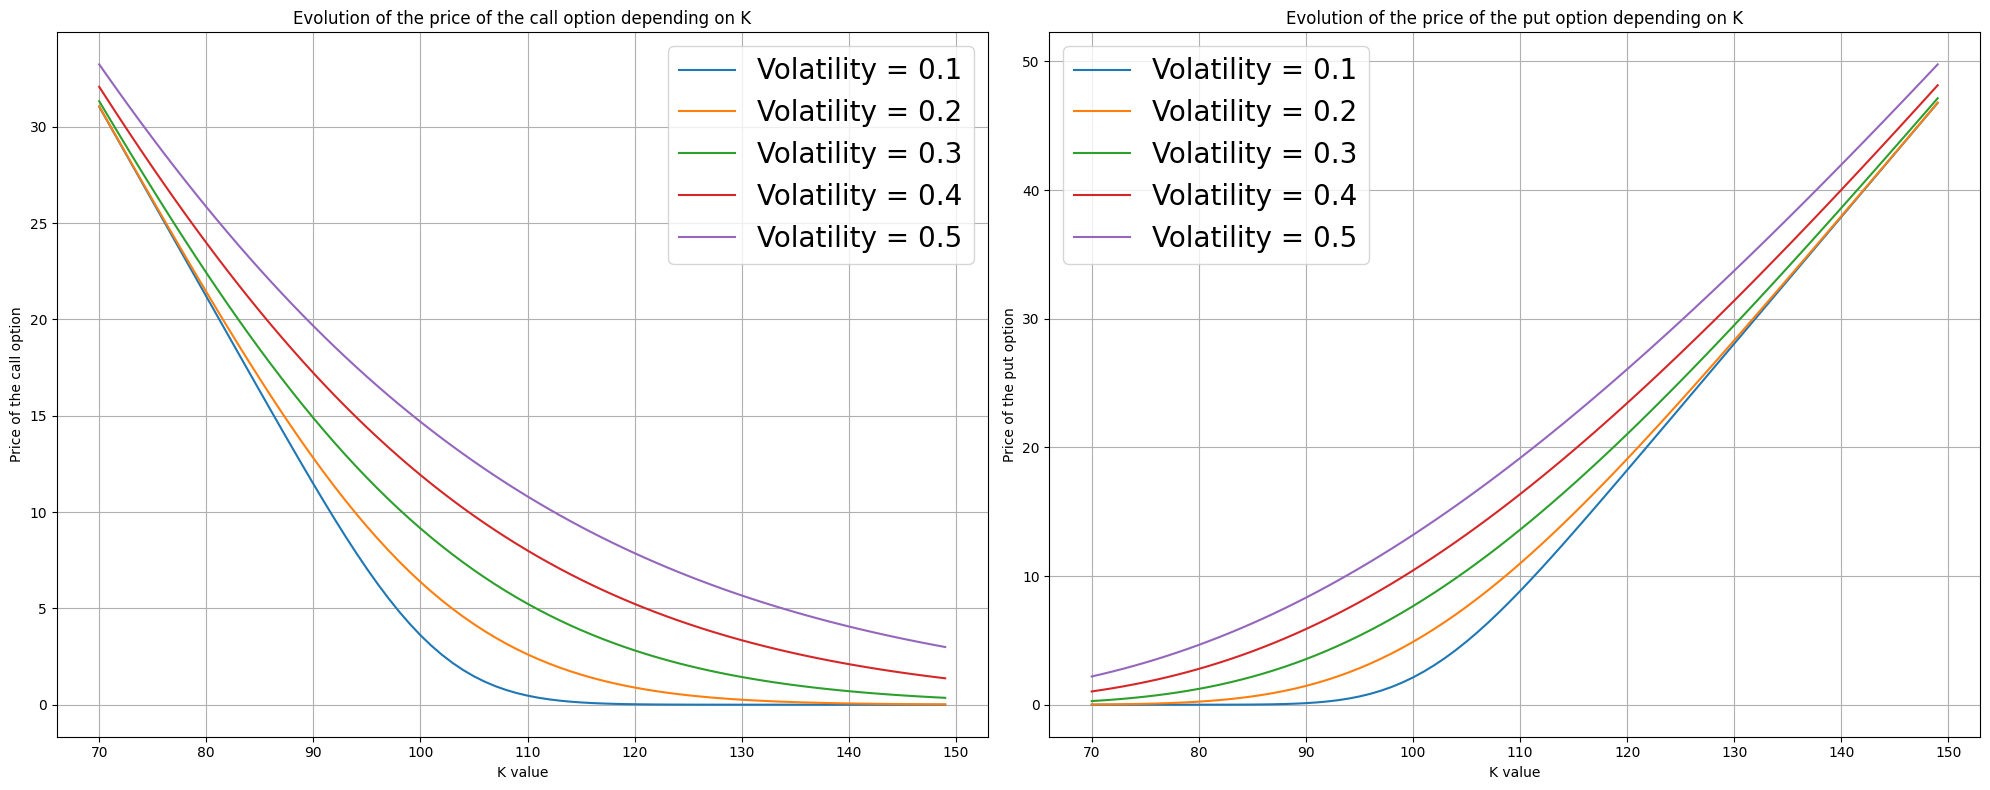

In [6]:
K_values = range(70, 150, 1)
volatility_values = np.arange(0.1, 0.6, 0.1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


for volatility in volatility_values:
    call_prices = [bs_options_pricing(S1, K, r, T, volatility, option_type='c') for K in K_values]
    ax1.plot(K_values, call_prices, label=f'Volatility = {round(volatility, 2)}')                   
ax1.set_xlabel('K value')
ax1.set_ylabel("Price of the call option")
ax1.set_title("Evolution of the price of the call option depending on K")
ax1.legend(fontsize=20)
ax1.grid(True)


for volatility in volatility_values:
    put_prices = [bs_options_pricing(S1, K, r, T, volatility, option_type='p') for K in K_values]
    ax2.plot(K_values, put_prices, label=f'Volatility = {round(volatility, 2)}')

ax2.set_xlabel('K value')
ax2.set_ylabel("Price of the put option")
ax2.set_title("Evolution of the price of the put option depending on K")
ax2.legend(fontsize=20)
ax2.grid(True)

plt.tight_layout()
plt.show()

The first thing we can observe is that the price of a call option is decreasing when the strike price increases. It aligns with our financial intuition. Indeed, as the strike price increases, the stock prices has also to increase in order to be advantageous for the buyer of the option. But as the initial price is fixed (100€), the more the strike price is high, the less the stock price has the possibility to reach it, we can observe this in the figure above representing the simulation of the stock price. So the less the buyer of the option has chances to make a profit. It is then logical that such an option is less expensive.
A similar reasoning can be applied to the put option. 

#### Price evolution with different strike and time maturity

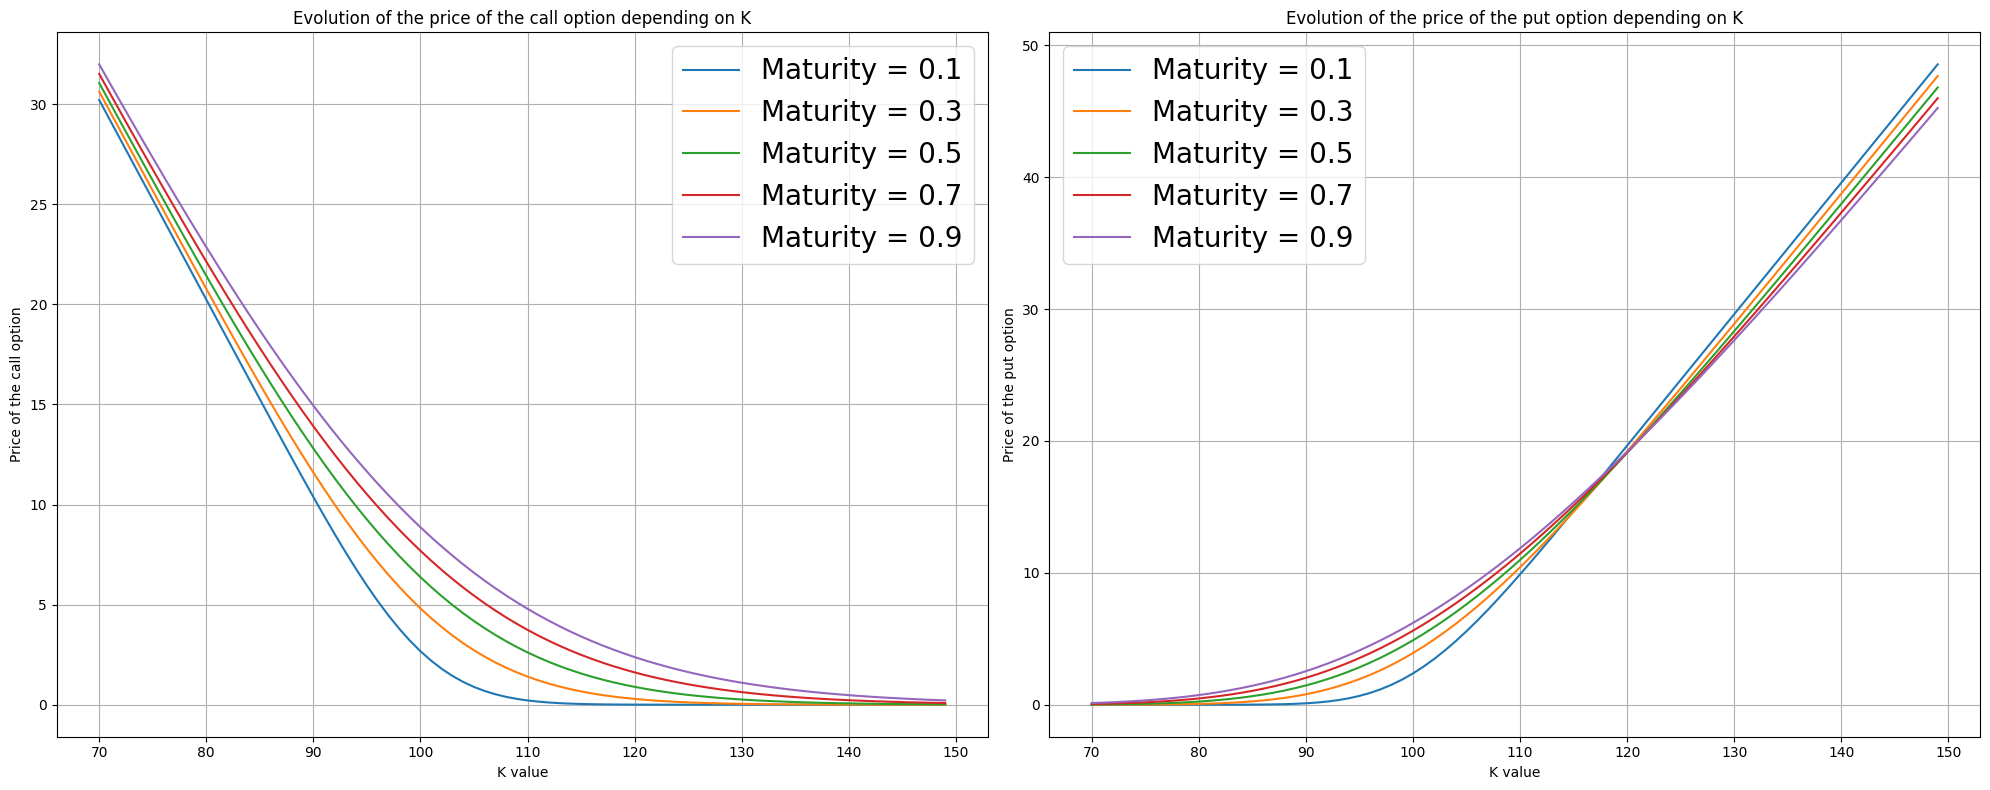

In [7]:
import matplotlib.pyplot as plt


K_values = range(70, 150, 1)
maturity_values = np.arange(0.1, 1.1, 0.2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))


for maturity in maturity_values:
    call_prices = [bs_options_pricing(S1, K, r, maturity, sigma, option_type='c') for K in K_values]
    ax1.plot(K_values, call_prices, label=f'Maturity = {round(maturity, 2)}')

ax1.set_xlabel('K value')
ax1.set_ylabel("Price of the call option")
ax1.set_title("Evolution of the price of the call option depending on K")
ax1.legend(fontsize=20)
ax1.grid(True)


for maturity in maturity_values:
    put_prices = [bs_options_pricing(S1, K, r, maturity, sigma, option_type='p') for K in K_values]
    ax2.plot(K_values, put_prices, label=f'Maturity = {round(maturity, 2)}')

ax2.set_xlabel('K value')
ax2.set_ylabel("Price of the put option")
ax2.set_title("Evolution of the price of the put option depending on K")
ax2.legend(fontsize=20)
ax2.grid(True)



plt.tight_layout()
plt.show()

Here is a very interesting observation. On the graph representing the evolution of a put options regarding values of strike and maturity, we can see that the price of a put option is increasing with the maturity. We can observe that untill a certain strike, the higher the maturity, the higher the price of the option. But after a certain strike, the higher the maturity, the lower the price of the option. We know that to make a profit, the stock price has to be lower than the strike price. But as we have positive expected rate of return, the stock price will increase. So the more the maturity is high, the more the stock price has the possibility to reach the strike price. It seems logical that the higher the strike price, the lower the maturity has to be to make a profit. Indeed, if the strike is 200 and the current price is 100, it is more likely that the stock price will stay under 200 in 6 months than in 2 years, considering the positive drift of the stock price.
But when the strike price is low or close to the current price, we need the maturity to be more and more low to make a profit as the stock price will reach the strike price quickly. Under a certains strike price, we have to count on the volatility of the stock price to hope to become back under the strike price. Indeed, we notice that when we increase the volatiliy, this treshold increases while when we increase the short rate of interest, this treshold decreases. Indeed, when the volatility increases we can count more on it to have a chance to stay under the strike price. But when the short rate of interest increases, the stock price will increase more quickly and so it will be more difficult to stay under the strike price.

# Options pricing with Machine Learning

In this section, we will study and apply differents approches to price options contracts with Machine Learning. After a quick presentation of the state of art of Machine Learning in finance, we will present the steps to construct the dataset that will be used. After a presentation of the dataset, we will go through the formalization of the machine learning problem. Then we will present three different methods to price options contracts with Machine Learning and finally we will compare these methods. 

## Machine Learning in Finance

Since the financial crisis of 2008, regulators have oriented their control towards *data-driven* methods. This has led to the storage of a large amount of financial data by financial institutions. Moreover, in the last decade, a new type of data has emerged : *alternative data*. This data is not directly related to the financial markets but can be used to predict the evolution of the markets. Social media, press articles, satellite images, weather data... are examples of alternative data. One the one hand, classical econometric models are not able to deal with this type of data, where then number of variables is very high. On the other hand, machine learning techniques offer the numerical power and functional flexibility needed to identify complex patterns in a high-dimensional space offering a significant improvement over econometric methods. Nevertheless, the use of machine learning is limited by the difficulty to interpret the results, especially with the use of Neural Networks. 
In our study of options pricing, we will not be using alternative data but we will use *market data*, i.e all the data that can be found on the financial markets : stock prices, interest rates, volatility...

## Dataset construction

The construction of the dataset has been way more complicated than expected. Indeed, market data are very sensitive and are not freely available. For instance, a bloomberg terminal, which is the most used tool in the financial industry, costs around 24 000$ per year. 

Moreover, our goal was to find informations related to european options contracts, which is even more rare than stock data. In the literature, two main approaches are used to construct the dataset : using real market data providing by the university or the company, or generating synthetic data, by using the Black-Scholes formula. Using the second approach would have been equivalent to use machine learning to approch the Black-Scholes formula, which is not the goal of this study. Nevertheless, as we will see, our goal will be to compare the results of the machine learning methods with the Black-Scholes formula. So we needed to have the same features as the Black-Scholes formula. So our problem will be to predict the price of an option contract with the following features :
- The current price of the stock : $S_0$
- The strike price of the option : $K$
- The time to maturity of the option : $T$
- The volatility of the stock : $\sigma$
- The risk-free interest rate : $r$

It is important to note that the notion of price of an option does not have a lot of sense in the real life because the volume of exchange of options is very high. In general the price of an option is represented by the bid and the ask value. The bid is the price at which the buyer is willing to buy the option and the ask is the price at which the seller is willing to sell the option. In general, the literature uses the mid price, which is the average of the bid and the ask, as the price of the option. This is also what we will do in this study.
A lot of different website has been considered to find the data (Kaggle, Yahoo Finance, Quandl,...) but none of them provided the data we needed, it was mainly stock data. Finally, we found a website that defined itself as *the git of data*, where users can upload datasets. These datasets are queryable directly in Python or downloaded in csv format. We used this dataset to find data related to options : https://www.dolthub.com/repositories/post-no-preference/options/data/master/option_chain. The features provided by this dataset are related to the options itself : 
- Emission date and expiration date
- Strike price 
- Call or put option
- Volatility
- Bid and ask price
- Greeks (delta, gamma, theta, vega, rho)
- Symbol of the stock (AAPL, MSFT,...)

But two informations used in the Black-Scholes formula are missing : the current price of the stock and the risk-free interest rate.
To find the stock price associated to the option, we will use another dataset of Dolthub : https://www.dolthub.com/repositories/post-no-preference/stocks. This dataset provides the stock price of a lot of companies at different dates.

Finally, the literature uses the risk-free interest rate as the interest rate of the US treasury bond. We found these informations directly on the website of the U.S Department of the Treasury : [U.S. DEPARTMENT OF THE TREASURY](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2019)

The Python function used to construct the final dataset is located in the data_processing.py file and named **process_data**. Firstly, we will compute the maturity of the option as the time, in years, between the expiration date and the emission date. Then the target value will be compute as the average of the bid and the ask price of the option. The goal of this function is to associate to each option, the stock price corresponding to the the symbol of the underlying asset of the option, at the emission date of the option. Moreover, the function will associate to each maturity and emission date the closest risk-free interest rate in terms of maturity at the emission date.

Finally, the function saves the pandas dataframes in a csv file.
This csv, file is too big to be uploaded in the repository but can be found in the following link : [dataset](https://filesender.renater.fr/?s=download&token=0bd9cb6b-e000-4150-91da-bc6d260c58fb) 

## Dataset exploration

In this section we will go through the exploration of the dataset.

In [8]:
df_options = pd.read_csv('../../data/options/options_processed.csv')

In [9]:
print(df_options.shape)
print(df_options.info())

(928514, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928514 entries, 0 to 928513
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              928514 non-null  object 
 1   act_symbol        928514 non-null  object 
 2   expiration        928514 non-null  object 
 3   strike            928514 non-null  float64
 4   call_put          928514 non-null  object 
 5   vol               928514 non-null  float64
 6   delta             928514 non-null  float64
 7   gamma             928514 non-null  float64
 8   theta             928514 non-null  float64
 9   vega              928514 non-null  float64
 10  rho               928514 non-null  float64
 11  price             928514 non-null  float64
 12  stock_price       928514 non-null  float64
 13  time_to_maturity  928514 non-null  float64
 14  interest_rate     928514 non-null  float64
dtypes: float64(11), object(4)
memory usage: 106.3+ MB
None


In [10]:
df_options.head()

,date,act_symbol,expiration,strike,call_put,vol,delta,gamma,theta,vega,rho,price,stock_price,time_to_maturity,interest_rate
0,2019-05-10,A,2019-05-17,65.0,Call,0.5636,0.9873,0.0055,-0.0185,0.0035,0.0122,11.725,76.64,0.019178,0.0242
1,2019-05-10,A,2019-05-17,65.0,Put,0.5636,-0.0127,0.0055,-0.0141,0.0035,-0.0002,0.040,76.64,0.019178,0.0242
2,2019-05-10,A,2019-05-17,70.0,Call,0.3212,0.9863,0.0102,-0.0133,0.0037,0.0132,7.150,76.64,0.019178,0.0242
3,2019-05-10,A,2019-05-17,70.0,Put,0.5252,-0.0850,0.0278,-0.0619,0.0166,-0.0013,0.225,76.64,0.019178,0.0242
4,2019-05-10,A,2019-05-17,72.5,Call,0.4973,0.8252,0.0486,-0.1018,0.0275,0.0112,5.150,76.64,0.019178,0.0242


We notice that our dataframe is composed of 928 514 options and 15 features, 4 are qualitative and 11 are quantitative. The qualitative features are the date of emission and the expiration date, the symbol of the underlying stock and the type of option (Call or Put). We will not consider these non quantitative features in our learning process.  

In [11]:
print(f'The dataset is composed of {df_options.shape[0]} rows.')
print(f'The options emissions are between {df_options["date"].min()} and {df_options["date"].max()}.')
print(f'There are {len(df_options["act_symbol"].unique())} different underlying stocks.')

The dataset is composed of 928514 rows.
The options emissions are between 2019-05-10 and 2020-02-21.
There are 1677 different underlying stocks.


In [12]:
df_options_quant = df_options.select_dtypes(include=[np.number])

In [13]:
df_options_quant.describe()

,strike,vol,delta,gamma,theta,vega,rho,price,stock_price,time_to_maturity,interest_rate
count,928514.000000,928514.000000,928514.00000,928514.000000,928514.000000,928514.000000,928514.000000,928514.000000,928514.000000,928514.000000,928514.000000
mean,108.214565,0.312672,0.00956,0.064311,-0.039952,0.073755,0.003961,5.372777,108.370494,0.084330,0.015825
std,162.234406,0.192360,0.60621,0.100568,0.100003,0.145951,0.086417,11.684132,161.657322,0.047111,0.001585
min,0.500000,-1.000000,-1.00000,0.000000,-9.909400,0.000000,-2.134200,0.005000,0.440000,0.005479,0.015000
25%,35.000000,0.217300,-0.47590,0.012800,-0.043100,0.011000,-0.012600,0.500000,36.050000,0.043836,0.015300
50%,67.000000,0.283000,0.00000,0.035200,-0.019300,0.035400,0.000000,2.100000,67.620000,0.082192,0.015500
75%,127.000000,0.378000,0.52710,0.079100,-0.006900,0.084700,0.016000,6.000000,127.550000,0.120548,0.015700
max,2500.000000,6.000000,1.00000,5.289700,0.000000,3.628900,2.990500,348.600000,2167.800000,0.273973,0.024300


<Axes: xlabel='time_to_maturity', ylabel='Count'>

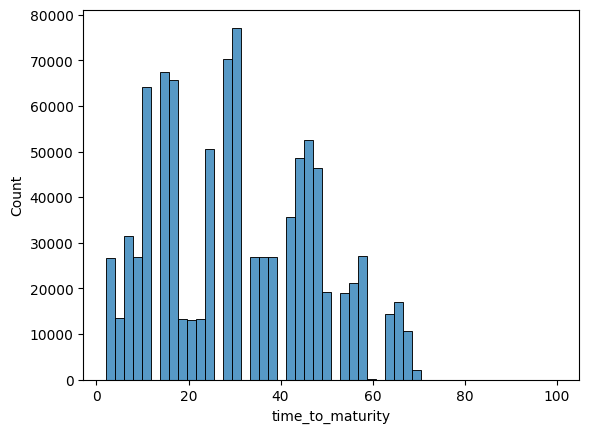

In [14]:
sns.histplot(df_options_quant["time_to_maturity"]*365, bins=50)

We observe that the maturity is between 0 and 60 days. 

<Axes: xlabel='price', ylabel='Count'>

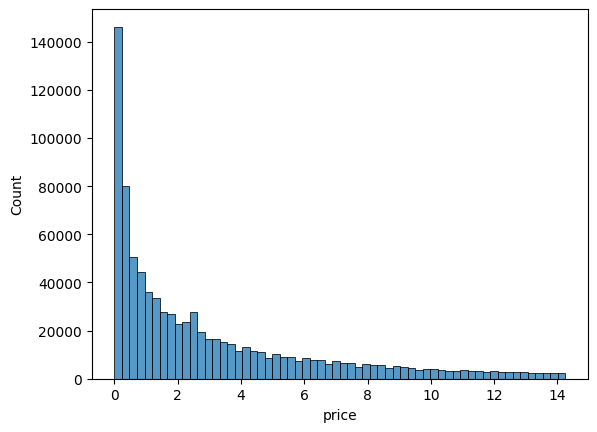

In [15]:
q1 = df_options_quant['price'].quantile(0.25)
q3 = df_options_quant['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_filtered = df_options_quant[(df_options_quant['price'] >= lower_bound) & (df_options_quant['price'] <= upper_bound)]
sns.histplot(df_filtered["price"], bins=60)

If we remove the outliers, we can see that prices of the options are between 0 and 14 with a lot of values close to 0.

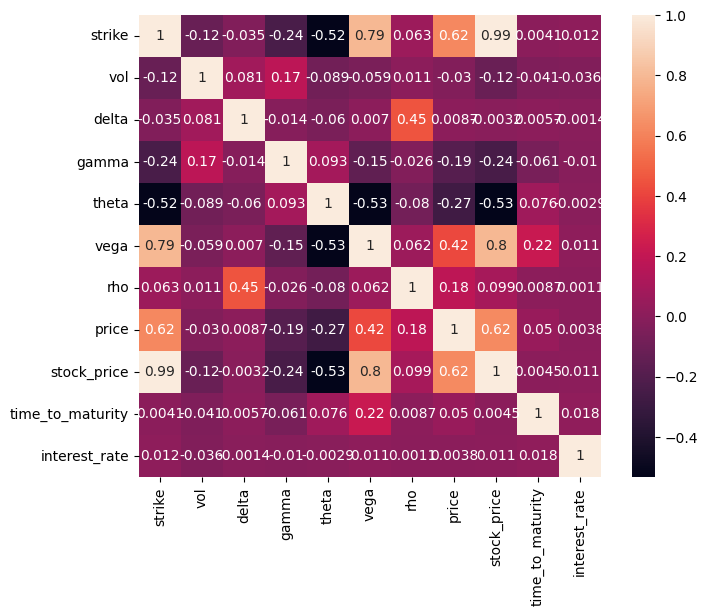

In [43]:
corr = df_options_quant.corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr, square=True, annot=True)
plt.show()

## Formalization of the machine learning problem

In this section, we will go through the formalization of the machine learning problem. 
Thank to the previous section, we know that we have 10 quantitative features to predict the price of the option. The price of the option is a real number, so we have a regression problem. Our dataset is composed of $n=928514
$ individual. 
Formally, we have a dataset $\mathcal{D} = \left\{(\mathbf{x}_i,y_i)\right\}_{i=1,...,n}$ where $\mathbf{x}_i \in \mathbb{R}^{10}$ is the vector of features and $y_i \in \mathbb{R}$ is the target value. We want to find a function $f$ such that :
$$f : \mathbb{R}^{10} \rightarrow \mathbb{R}$$
$$f(\mathbf{x}_i) = \hat{y_i} \approx y_i$$

We will use the following metrics to evaluate the performance of our models :
- The mean squared error (MSE):  $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$

- The mean absolute error (MAE) : $\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|$
- The Mean Absolute Percentage Error (MAPE) : $\frac{1}{n}\sum_{i=1}^{n}\frac{|y_i - \hat{y_i}|}{y_i}$
- The R2 score : $1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$


As our dataset is composed of a lot of individual, we will train our model on a subset of the dataset, mainly because the training would be too long. The user can choose the size $N$ where $N\leq n$ individuals. We will have 3 differents way of taking a subset of the dataset :
- Randomly : we will take a random subset of the dataset
- Sequentially : Choosing a random index and taking the next $N$ individuals
- By underlying stock : We will the $N$ first individuals of the dataset ranked by the number of options of the underlying stock

These three methods will be used to train the models and evaluate the results. To perform the final test of the model, two options are possible : 
- We take a percentage of the subset of the dataset and split it into a train set and a test set. The advantage of this method is that the data used to train and to test the model should look alike. The disadvantage is that we do not know if the model is able to generalize to new data.
- We take a subset to train and validate the model and then, we take a certain amount (determined by the user) of individuals of the original dataset that are not present in the subset to test the model. The advantage of this method is that we can see if the model is able to generalize to new dat, that can be very different from the training data.

We will use as a baseline the Black-Scholes formula to price the options. We will compute the price of the options with the Black-Scholes formula and compare the results with the machine learning methods.

Finally, from a more practical point of view, all the parameters of the models, the choices to subset the data,... will be given by a python dictionary named **params**. This dictionary will be used in the following sections to train the models and evaluate the results.

## Gaussian process regression

In this section, we will present the Gaussian Process Regression, a sketch of the theory and the implementation of this method to price options contracts.

Before applying this method to our real data, we will first apply it to data generated by the Black-Scholes formula. We will then compare the results of the Gaussian Process Regression with the Black-Scholes formula.

### Non-Parametric Regression Model

A Gaussian Process Regression (GPR) is a non-parametric model that approximates a function $f$ from a dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n$. This model assumes that the values of $f$ are Gaussian random variables. GPR is particularly suitable for problems with noise and uncertainty.

A Gaussian Process (GP) is a collection of random variables, any finite number of which have a joint Gaussian distribution. The kernel function, also known as the covariance function, measures the similarity between two points. The parameters of this covariance function are learned from the data by maximizing the likelihood of the training data. This involves constructing the covariance matrix between the training points and the covariance matrix between the training and test points.

### Model Formalization

Given a training dataset $X$ and $y$ where $X$ is an $n \times d$ matrix and $y$ is an $n \times 1$ vector, a function is said to come from a Gaussian process if, for any set of points $X = x_1, \ldots, x_n$, the vector $(f(x_1), \ldots, f(x_n) \sim \mathcal{N}(\mu, K_{X,X})$.

We choose a covariance function $k(x_i, x_j)$ and estimate its parameters by maximizing the likelihood of the training data.

We can then compute a covariance matrix $K$ between the training points and a covariance matrix $K_*$ between the training and test points. Our goal is to determine $y | x \sim \mathcal{N}(f(x), \sigma^2)$.

The predictive distribution conditionally on a test point $x_*$ is given by:
$$f_* | x_*, X, y \sim \mathcal{N}(\mathbb{E}[f_* | x_*, X, y], \text{var}(f_* | x_*, X, y)) $$

Where:
$$\mathbb{E}[f_* | x_*, X, y] = K_*(K + \sigma^2I)^{-1}y $$
$$\text{var}(f_* | x_*, X, y) = k(x_*, x_*) - K_*(K + \sigma^2I)^{-1}K_*^T $$


### Implementation of Gaussian Process Regression on synthetic data

In [17]:
r_gp = 0.02  
K_gp = 130
sigma_gp = 0.4 
T_gp = 2   
# Lower bound and upper bound for the stock price generation
lb = 0.001           
ub = 300             

training_number = 5
testing_number = 20 


train_x_1 = np.linspace(0, 1, training_number).astype('float32').reshape(training_number, 1)
train_y_1 = [bs.bs_options_pricing(lb+(ub-lb)*S,K_gp,r_gp,T_gp,sigma_gp)[0] for S in train_x_1]

test_x_1 = np.linspace(0, 1, testing_number).astype('float32').reshape(testing_number, 1)
test_y_1 = [bs.bs_options_pricing(lb+(ub-lb)*S,K_gp,r_gp,T_gp, sigma_gp)[0] for S in test_x_1]

In [ ]:
sk_kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-05, 1000.0))
gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=20)
gp.fit(train_x_1, train_y_1)

In [19]:
y_pred_1, sigma_1 = gp.predict(test_x_1, return_std=True)
mape, mae, mse, r2 = bs.compute_metrics(test_y_1, y_pred_1)

Text(0, 0.5, 'Call option price')

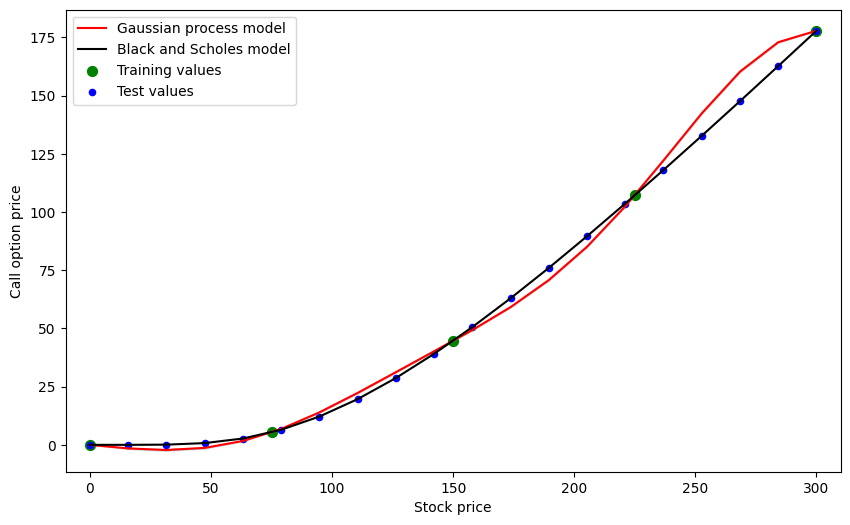

In [20]:
plt.figure(figsize=(10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb) * test_x_1.flatten(), y_pred_1, color='red', label='Gaussian process model')
plt.plot(lb+(ub-lb) * test_x_1.flatten(), test_y_1, color='black', label='Black and Scholes model')
plt.scatter(lb+(ub-lb) * train_x_1, train_y_1, color='green', marker='o', s=50, label='Training values')
plt.scatter(lb+(ub-lb) * test_x_1.flatten(), test_y_1, color='blue', marker='o', s=20, label='Test values') # Add circles for test values
plt.fill_between(lb+(ub-lb) * test_x_1.flatten(), (y_pred_1.T - 2 * sigma_1).flatten(), (y_pred_1.T + 2 * sigma_1).flatten(), color='grey', alpha=0.3)
plt.legend(loc='best', prop={'size': 10})
plt.xlim([lb-10, ub+10])
plt.xlabel('Stock price')
plt.ylabel('Call option price')

We will focus our study on the price of a call option. 

In [21]:
df_options_c = df_options.loc[df_options['call_put'] == 'Call']

### Gaussian process on real data

As we said before, we will group all the parameters of our models in python dictionnary. Then we will train and test the model by calling the specific function, with the params dictionnary as argument. This function returns the results of the model. 
Here is the list of all the params used in this section : 
- The name of the run, to identify the results : *name_run*
- The way we want to subset the data (random, sequentially, by underlying...): *type_batch*
- The test set size : *test_size*
- The size of the subset of the dataset : *n_rows*
- If we want to standardize the data : *standardize*
- If we want to perform multiple runs and average the results : *number_time_repeat*
- If we want to perform PCA on the data : *pca*
- The number of components of the PCA : *n_pc*
- If we want to perform Black-Scholes evaluation : *bs_eval*
- The list of features we want to use : *features*
- The Gaussian process class we want to use : *gaussian_process*

In [22]:
params_gp = {
    'name_run': 'gaussian_process_act',
    'type_batch': 'create_train_test_set_by_act_symbol', # name of the function to create the batch of data
    'test_size' : 50000, # proportion of test set
    'standardize': True, # standardization of the data
    'number_time_repeat' : 1,
    'pca': False, # PCA on the data
    'n_pc': 10, # number of principal components to keep if PCA is True
    'bs_eval': True, # Black-Scholes evaluation
    'n_rows' : [500, 1000, 2000], # number of rows to keep in the dataset
    'features': ['strike', 'stock_price', 'vol', 'delta', 'gamma', 'theta', 'vega', 'rho', 'time_to_maturity', 'interest_rate'], # features for the model  
    'gaussian_process': {
        'GaussianProcessRegressor': {
            'kernel': RBF(length_scale=1),
            'n_restarts_optimizer': 1,
            'alpha': 0.01,
            # 'random_state': 42, 
        }
    }
}

In [23]:
dicts_test_act = mt.train_test_gp_model(params_gp, df_options_c)

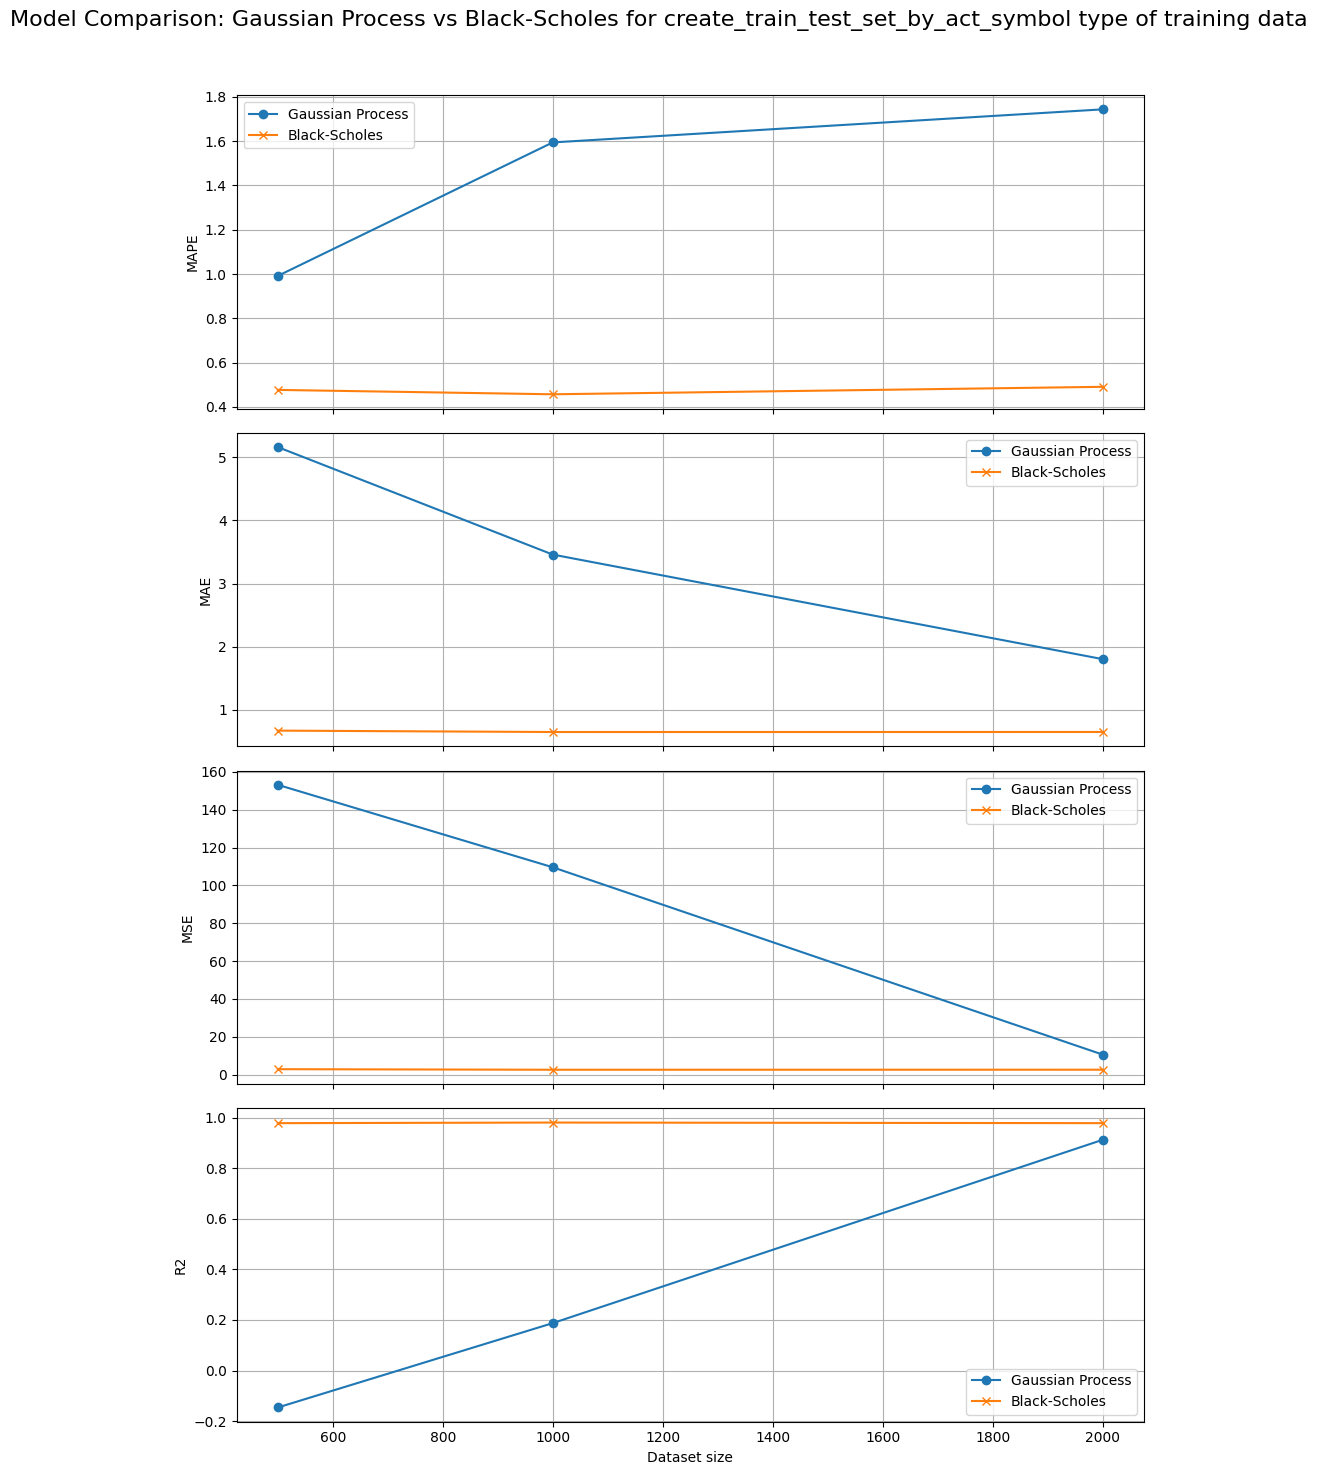

In [24]:
me.plot_model_comparison_from_dict(dicts_test_act, params_gp, 'Gaussian Process', params_gp['type_batch'])

## Neural Networks 

In this section, we will go through the application of Neural Networks to price options contracts. Neural networks are very powerful and, from many articles about pricing options, seem to be one of the best methods. Nevertheless, the main problem with neural networks is the difficulty to interpret the results, the black box aspect of the model. First, lets present how neural networks work. 

As the name suggests, neural networks are inspired by the human brain. The basic unit of a neural network is the neuron. A neuron is a mathematical function that takes as input a vector of real numbers and returns a real number. In the basics neural networks, there are three parts. 
- The inputs : often called the input layer. In our case, this layer will be composed of neurons, each corresponding to one feature of our model. If we consider all the 10 features available (stock price, maturity, strike, ...), we will have 10 input neurones. 
- The second part of the neural network is the hidden layers. These layers are composed of neurons that take as input the output of the previous layer. Each hidden neurone is connected to all the previous neurones and a weight $w$ is associated to each connection. Each neurone of a hidden layer returns a real number that is the result of a mathematical function applied to the linear combination of the outputs of the previous layer. 
- The last part of the neural network is the output layer, in our case, the prediction of the price of the option, so the output layer is composed of one neuron that returns the price of the option. A neural network learns by adjusting the weights of the connections between the neurons. The figure below shows a Neural network with $I$ input neurones, 1 hidden layer with $J$ neurones and 1 output layer with 1 neurone.

The learning process is done by minimizing a loss function. The loss function is the following (using the convention of the figure below) : 
$$
E(\omega) = \sum_{n=1}^N(t_n - g_1(x_n,\omega))^2
$$
To optimize, neural networks use the backpropagation algorithm. This algorithm uses the chain rule of calculus to compute the partial derivatives of the loss function with respect to the weights of the connections. The weights are then updated using the gradient descent algorithm.

As we said, each neurones of the hidden layers apply a mathematical function to the linear combination of the outputs of the previous layer. This function is called the activation function.
Here is a list of the most used activation functions :
- The sigmoid function : $\sigma(x) = \frac{1}{1 + e^{-x}}$
- The hyperbolic tangent function : $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- The rectified linear unit function : $ReLU(x) = \max(0,x)$
- The leaky rectified linear unit function : $LeakyReLU(x) = \max(0.01x,x)$
- The softmax function : $\text{softmax}(x)_i = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$

In our case, we will use the Leaky ReLU activation function for the hidden layers and the ReLU activation function for the output layer, as we know that the price of the option is a positive number.
<p align="center">
  <img src="../images/ffnn.png" width="100%">
</p>

For our model, we will use the following architecture :
- $n$ input neurones : one for each feature
- 2 hidden layers with 128 neurones each
- 1 output layer with 1 neuron


We will use the *Adam* optimizer : the most common algorithm to perform the learning process of the neural networks. 

We will use the mean squared error as the loss function.
 and the mean squared error as the loss function.

In [25]:
def build_model(input_shape, learning_rate=0.001):
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')
    x = tfkl.Dense(128, name='dense_1')(input_layer)
    x = tfkl.Activation('leaky_relu', name='relu_1')(x)
    x = tfkl.Dense(128, name='dense_2')(x)
    x = tfkl.Activation('leaky_relu', name='relu_2')(x)
    output = tfkl.Dense(1, name='output')(x)
    output_layer = tfkl.Activation('relu', name='output_activation')(output)
    # we use relu activation function to avoid negative prices

    model = tfk.Model(input_layer, output_layer, name='pricing_model')
    opt = tfk.optimizers.Adam(learning_rate=learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(optimizer=opt, loss=loss, metrics=mtr)
    return model

The parameters for the neural network are quite similar to those for the Gaussian Process. Here are the additional parameters for the neural network :
- epochs : the number of pass through the dataset
- batch_size : the number of samples used to compute the gradient
- learning_rate : the step size at each iteration of the gradient descent

Moreover, we will use *callbacks* to monitor the training of the neural network. We will use the *EarlyStopping* callback to stop the training when the validation loss does not decrease anymore. so in practice we will no go through all the epochs. We will also use the *ReduceLROnPlateau* callback to reduce the learning rate when the validation loss does not decrease anymore.. 

In [26]:
params_dl = {
    'name_run': 'NN_idx',
    'type_batch': 'create_train_test_set_random', # name of the function to create the batch of data
    'test_size' : 50000,
    'test_value' : 200, # if we choose no to train_test_split
    'standardize': True, # standardization of the data
    'n_rows' : [50000], # number of rows to keep in the dataset
    'name_run' : 'cb_multiple_row',
    'number_time_repeat' : 1,
    'pca': False, # PCA on the data
    'n_pc': 10, # number of principal components to keep if PCA is True
    'bs_eval': True, # Black-Scholes evaluation
    'epochs': 1000,
    'batch_size': 32,
    'features': ['strike','vol', 'delta', 'gamma', 'theta', 'vega', 'rho', 'stock_price','time_to_maturity', 'interest_rate'],
    "callbacks": {
        "EarlyStopping": {
            "monitor": "val_mse",
            "patience": 20,
            'min_delta': 0.01,
            "restore_best_weights": True,
        },
        "ReduceLROnPlateau": {
            "monitor": "val_mse",
            "factor": 0.1,
            "patience": 5,
            "min_lr": 1e-5,
        },
    }
}
callbacks = [
    getattr(tfk.callbacks, name)(**params) for name, params in params_dl['callbacks'].items()
]


In [27]:
dicts_test_dl = mt.train_test_dl_model(params_dl, callbacks, df_options_c)

Epoch 1/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 36.5437 - mse: 36.5437 - val_loss: 13.4547 - val_mse: 13.4547 - learning_rate: 0.0010
Epoch 2/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7.2023 - mse: 7.2023 - val_loss: 10.2286 - val_mse: 10.2286 - learning_rate: 0.0010
Epoch 3/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.8144 - mse: 5.8144 - val_loss: 9.2935 - val_mse: 9.2935 - learning_rate: 0.0010
Epoch 4/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.4283 - mse: 4.4283 - val_loss: 6.1403 - val_mse: 6.1403 - learning_rate: 0.0010
Epoch 5/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.8388 - mse: 4.8388 - val_loss: 6.0504 - val_mse: 6.0504 - learning_rate: 0.0010
Epoch 6/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5643 - mse: 3.5643 - val_loss: 5.5675 - val_mse: 5.5675 - learning_rate: 0.0010
Epoch 7/1000
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.2698 - mse: 3.2698 - val_loss: 2.6573 - val_mse: 2.6

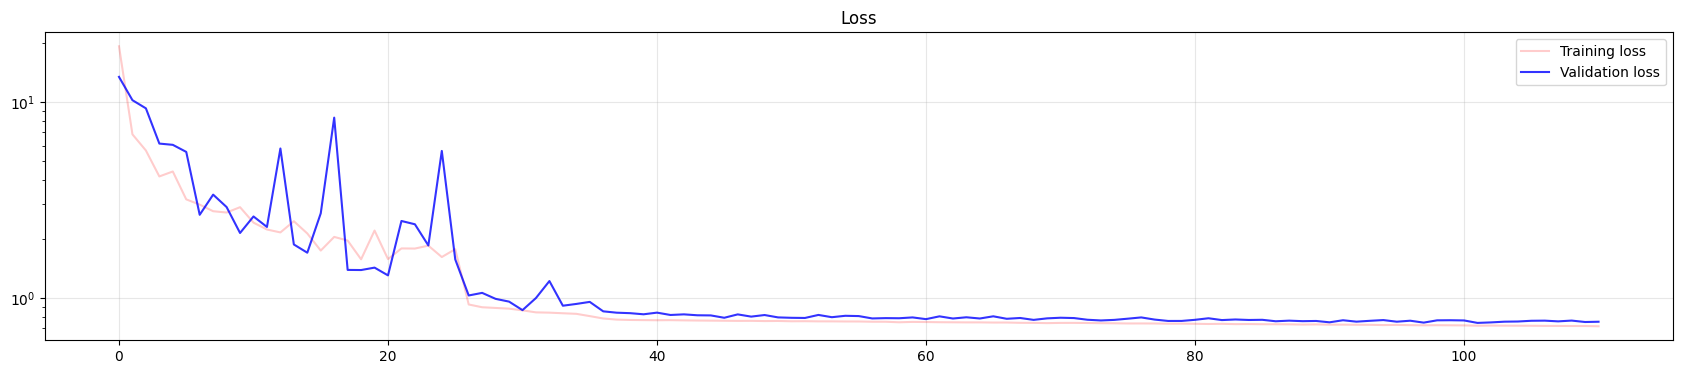

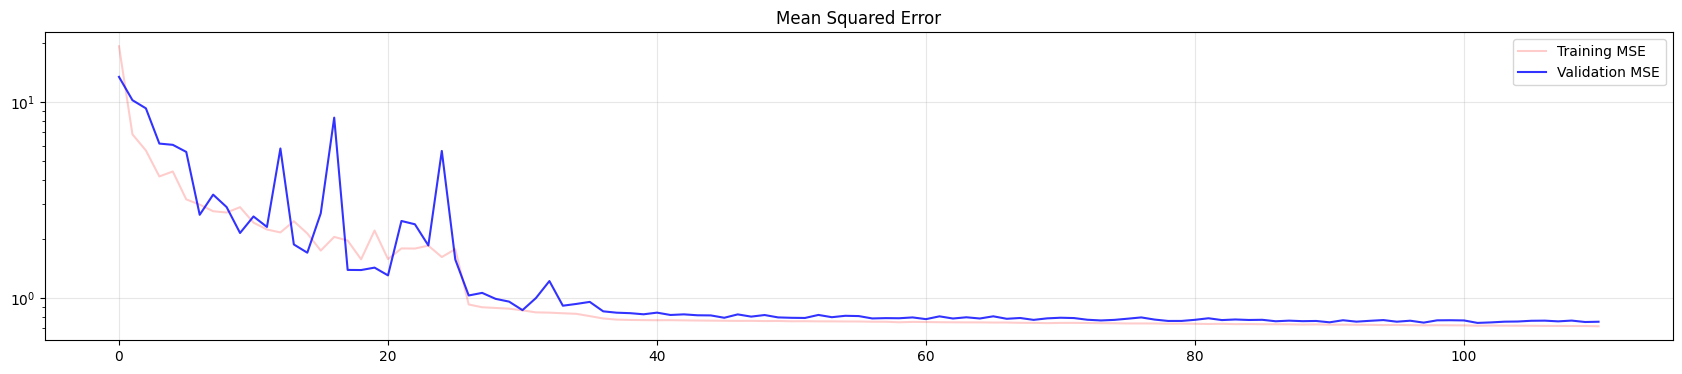

In [28]:
me.plot_loss_mse(dicts_test_dl[50000]['cb_multiple_row']['history'])

## Multiple Linear Regression

We saw, in the previous section that one of the main disadvantage of the neural networks is the difficulty to interpret the results. In this section, we will present a more simple method to price options contracts : the Multiple Linear Regression. This method has the advantage to permit the interpretation of the results, of the coefficients of the model. This model aims to find the linear relationship between the features (explanatory variables) and the target value (dependent variables). The model is defined by the following equation :
$$
Y = b_0 + b_1x_1 + b_2x_2 + ... + b_px_p + \epsilon
$$
Where $Y$ is the target value, $b_0$ is the intercept of the model, $b_1,...,b_p$ are the coefficients of the model and $x_1,...,x_p$ are the features. $\epsilon$ is the error term. 

As usual, we will define params dictionnary for the Multiple Linear Regression. 
Here are the additional parameters :
- fit_intercept : if we want to fit the intercept of the model
- include_square_x : if we want to include the square of the features in the model to take into account the non-linear relationship between the features and the target value. We did not notice any improvement by including the square of the features in the model.

In [29]:
params_lr = {
    'type_batch': 'create_train_test_set_random', # name of the function to create the batch of data
    'test_size' : 50000, # If we choose 0, we test on all the rest of the data (not used for training or validation
    'n_rows' : 10000,
    'standardize': False,
    'fit_intercept' : True, # Default is True but our data are already centered 'If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).'
    'features': ['strike','vol', 'delta', 'gamma', 'theta', 'vega', 'rho', 'stock_price','time_to_maturity', 'interest_rate'],
    'include_square_x': False,
}

In [30]:
get_batch_data = getattr(dp, params_lr['type_batch']) 
X_train, X_test, y_train, y_test, scaler, pca = get_batch_data(df_options_c, 
                                                                params_lr['test_size'], 
                                                                params_lr['n_rows'], 
                                                                params_lr['features'], 
                                                                params_lr['standardize'],
                                                                False,
                                                                0
                                                                )
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
if params_lr['include_square_x']:
    for col in X_train.columns:
        X_train[col + '_2'] = X_train[col] ** 2
        X_test[col + '_2'] = X_test[col] ** 2


(10000, 10) (50000, 10) (10000,) (50000,)


In [31]:
lin_reg_model = LinearRegression(fit_intercept=params_lr['fit_intercept'])

In [ ]:
lin_reg_model.fit(X_train, y_train)

In [33]:
y_pred = lin_reg_model.predict(X_test)
bs.compute_metrics(y_test, y_pred)

(3.2257742465227084, 1.3972740287441858, 7.306951681472268, 0.9395793193356702)

The first observation, regarding the parameters standardize & fit_intercept is 

| standardize      | fit_intercept      | MSE      |
| -------------- | -------------- | -------------- |
| False | True |  8.747 |
| True | True | 8.209 |
| False | False | 8.576 |
| True | False | 38.449 |

If we choose no to fit intercept, it means that the regression line will have to pass through the origin. We remark that when we choose to fit the intercept, the MSE is higher when we don't standardize the data, but remains close. It means that the standardization of the data still has an impact on the results, even if we choose to fit the intercept.

Now let's focus on the third and fourth row of this table. When we standardize the data, the mean of the features will be 0 so fitting the intercept should not have a big impact. Nevertheless, we can see that the MSE is very different when we choose to fit the intercept or not (when we standardize the data). By looking at the coefficients of the model, for each scenario, we can notice that the coefficients are very similar in both cases but the intercept coefficient (in the case we choose to fit the intercept) is very high, it is indeed the third highest coefficient of the model, so it has a big impact on the prediction. The fact that the last scenario do not fit the intercept is thus very penalized

| Variable          | std_F_intercept_T | std_T_intercept_T | std_F_intercept_F | std_T_intercept_F |
|-------------------|-------------------|-------------------|-------------------|-------------------|
| strike            | -0.363373         | -58.916325        | -0.363689         | -58.916325        |
| vol               | 3.756853          | 0.721962          | 3.606665          | 0.721962          |
| delta             | 0.335665          | 0.114061          | 0.255977          | 0.114061          |
| gamma             | -3.869552         | -0.387780         | -3.998690         | -0.387780         |
| theta             | 0.935594          | 0.111969          | 0.922205          | 0.111969          |
| vega              | -36.960191        | -5.399981         | -36.864209        | -5.399981         |
| rho               | 54.976466         | 4.846585          | 55.246246         | 4.846585          |
| stock_price       | 0.414179          | 66.938573         | 0.414222          | 66.938573         |
| time_to_maturity  | 11.772136         | 0.554776          | 11.046448         | 0.554776          |
| interest_rate     | 4.394877          | 0.006967          | -89.811216        | 0.006967          |
| intercept         | -1.674259         | 5.471931          | 0.000000          | 0.000000          |



### Coefficients

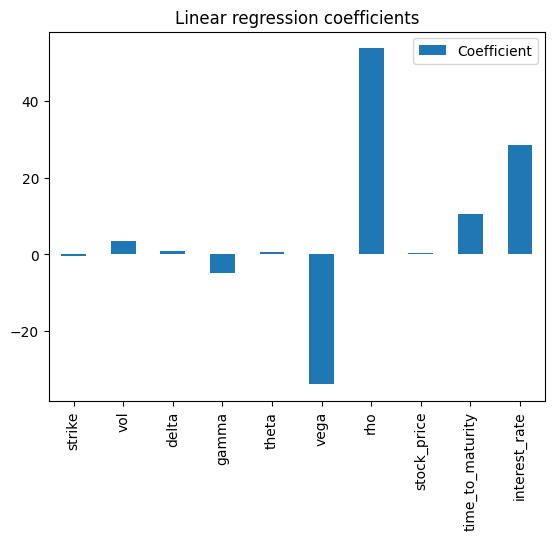

In [34]:
coefficients = pd.DataFrame(lin_reg_model.coef_, X_train.columns, columns=['Coefficient'])
coefficients.plot(kind='bar')
plt.title('Linear regression coefficients')
plt.show()

In [35]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train

### Anova and coefficients significance test

For this part, we will not use scikit-learn but the statsmodels library, which provides more statistical information about the model. We will use the OLS (Ordinary Least Squares) method to fit the model. This method is the most common method to fit a linear regression model. The OLS method minimizes the sum of the squared differences between the observed and predicted values. Then we will print the summary provided by statsmodel and then we will print the Anova table and the coefficients significance test.

The F-test has the following hypothesis : 
$$
\left\{\begin{matrix}
H_0 : b_1 = b_2 = ... = b_p = 0\\
H_1 : \exist j \in \left \{ 1, ..., p \right \} b_j \neq 0
\end{matrix}\right.
$$

A t-test is performed for each coefficient to test the null hypothesis that the coefficient is equal to 0. The t-test has the following hypothesis :
$$
\left\{\begin{matrix}
H_0 : b_j = 0\\
H_1 : b_j \neq 0
\end{matrix}\right.



In [36]:
formula = 'y ~ ' + ' + '.join(df_train.columns[:-1])
# 'y ~ strike + vol + delta + gamma + theta + vega + rho + stock_price + time_to_maturity + interest_rate'
model_sm = ols(formula, data=df_train).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:26:27   Log-Likelihood:                -24476.
No. Observations:               10000   AIC:                         4.897e+04
Df Residuals:                    9989   BIC:                         4.905e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9322      0.295  

In [37]:
anova_results_stats = anova_lm(model_sm)
print(anova_results_stats)

                      df         sum_sq        mean_sq             F  \
strike               1.0  394836.019061  394836.019061  50401.698817   
vol                  1.0   10584.351793   10584.351793   1351.116123   
delta                1.0  237943.901735  237943.901735  30374.069972   
gamma                1.0    5060.446623    5060.446623    645.977303   
theta                1.0     186.304771     186.304771     23.782220   
vega                 1.0    1751.874873    1751.874873    223.630736   
rho                  1.0  385525.201563  385525.201563  49213.152188   
stock_price          1.0  107670.201307  107670.201307  13744.341438   
time_to_maturity     1.0    1912.466181    1912.466181    244.130575   
interest_rate        1.0      20.819371      20.819371      2.657639   
Residual          9989.0   78251.667840       7.833784           NaN   

                         PR(>F)  
strike             0.000000e+00  
vol               1.546649e-277  
delta              0.000000e+00  

In [38]:
# Another way to do the F-test
model_sm.f_test('strike = vol = delta = gamma = theta = vega = rho = stock_price = time_to_maturity = interest_rate = 0')


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=14622.477960962056, p=0.0, df_denom=9.99e+03, df_num=10>

In [39]:
# To test if one of the coefficients is different from 0
model_sm.t_test('strike = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.3454      0.003   -107.128      0.000      -0.352      -0.339

We notice that the F-statistic is very high : 6.892e+05 and the p-value is very low : 0.00. This means that the test is significant : there is a relationship between the features and the target value. 
Considering the t-tests, we observe that all the p-values are very low, except for the interest_rate feature. This means that all the features are significant except the interest rate.

### Residuals analysis 

In this section we will verify the assumptions of the linear regression model : 
- The residuals are normally distributed, ie $\epsilon \sim \mathcal{N}(0,\sigma^2)$
- The residuals are homoscedastic, ie the variance of the residuals is constant

To verify these assumptions, we will use standardized residuals $\tilde{\varepsilon_i}$
We will compute these residuals with this approach 
- We compute the matrice $R = I_n-X(X^TX)^{-1}X^T$
remark : $R = I_n - H$ where $H$ is the hat matrice such that $\hat{Y} = HY$
- We compute the residuals : $ \hat{\varepsilon }_i = Y_i - \hat{Y_i}$
- Compute variance : $\hat{\sigma}^2 = \frac{1}{n-p}\sum_{i=1}^n\hat{\epsilon_i}^2$ 
- $\tilde{\varepsilon_i} = \frac{\hat{\varepsilon }_i}{\sqrt{\hat{\sigma}^2\times r_{ii}}}$

This approach is implemented in the *compute_standardized_residual_fast* function of the linear_reg.py file.

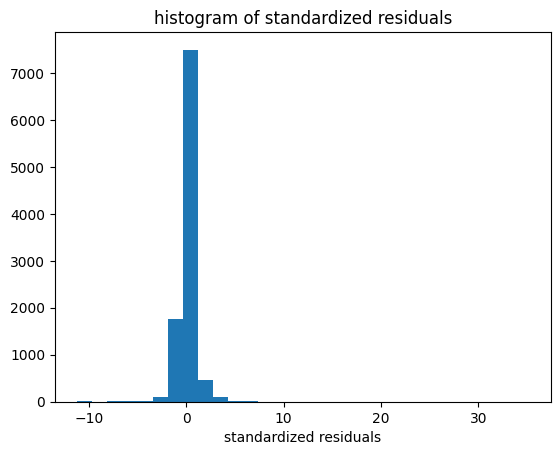

In [40]:
y_pred_train = lin_reg_model.predict(X_train)
p = len(params_lr['features'])
standardized_residuals = lr.compute_standardized_residuals_fast(X_train, y_train, y_pred_train, p)
plt.hist(standardized_residuals, bins=30)
plt.xlabel('standardized residuals')
plt.title('histogram of standardized residuals')
plt.show()

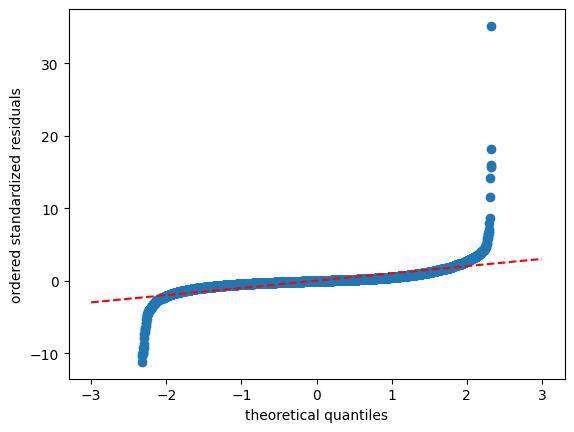

In [41]:
# We use the quantile function ppf of normal distribution
theoretical_quantiles = norm.ppf(np.linspace(0.01, 0.99, len(standardized_residuals)))
residuals_sorted = np.sort(standardized_residuals)
plt.scatter(theoretical_quantiles, residuals_sorted)
plt.xlabel('theoretical quantiles')
plt.ylabel('ordered standardized residuals')
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')


The QQ plots are used to verify the normality of the residuals. In our case, we can see that the points around the center of the QQ plot are aligned with the line, but the tails are not. This means that the residuals are normally distributed around the mean but not in the tails. This would mean that there exist more extreme values than expected in a normal distribution.

Text(0, 0.5, 'standardized residuals')

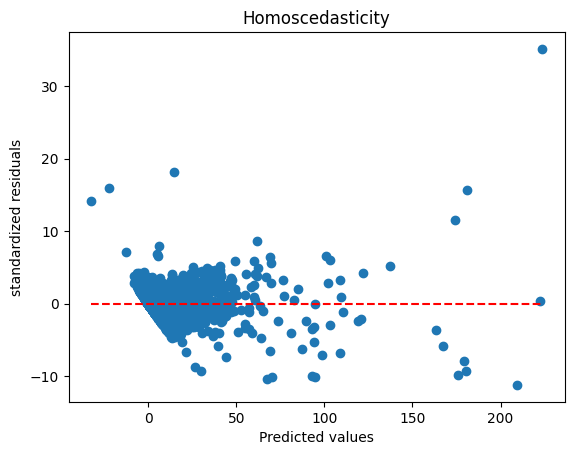

In [42]:
plt.scatter(y_pred_train, standardized_residuals)
plt.plot([min(y_pred_train), max(y_pred_train)], [0, 0], color='red', linestyle='--')
plt.title('Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('standardized residuals')

The graph shows that the homoscedasticity assumption can be considered verified, as we do not observe major variation in the dispersion of the residuals.

## Comparaison of the methods 

In this last section, we will compare the results of the three methods to price options contracts, by using the Mean Squared Error. As it was said before, our all dataset is composed of 1 million individuals. Half of the dataset is composed of put options and the other half of call options. We will focus on the pricing of call option, indeed, in real life, we will always have the information about the type of asset to price. Moreover, as $500 000$ number of individuals is too big to train the models on a local machine, we will take a subset of the dataset, to train the model. We have implemented three methods to take the subset of the dataset :
- Randomly (random) : we will take a random subset of the dataset
- Sequentially (by index) : Choosing a random index and taking the next $N$ individuals
- By underlying stock (by activity) : We will the $N$ first individuals of the dataset ranked by the number of options of the underlying stock. 


The main goal of this comparaison is to see which method, on which subset of the dataset, is able to generalize the best to new data. This is what will be in done in real life : the test data will be composed of totally new data, maybe very different from the training data. 
For the Neural Networks and the Multiple linear regression, we will test the model for $N = 500, 1000, 2000, 3000, 5000, 10000, 50000, 100000$. For the Gaussian Process Regression, we will test the model for $N = 500, 1000, 2000, 3000, 5000$. The reason is that the Gaussian Process Regression is very slow to train.

The testing data will be composed of $50 000$ individuals, randomly chosen in the dataset, that are not present in the training data.

We will use the Black-Scholes formula as a baseline to compare the results of the models. The method gives an Mean Squared Error of 2.8. 

The results are presented threw the graphs below. 

<p align="center">
  <img src="../images/results_idx.png" width="49%">
  <img src="../images/results_act.png" width="49%">
  <img src="../images/results_random.png" width="50%">
</p>


The first thing we can notice is that, the only case where a machine learning method has better results than the Black-Scholes formula is with the Neural Networks method, on data chosen randomly. Except for the Gaussian-Procces, this method of choosing the training data is the best. Indeed, as our test data is composed of totally new data, the best way to train the model is to take a random subset of the dataset, so that the model can learn of very different data without learning some specific patterns. 

The idea behind the sequentially method for choosing traning data is to capture the temporality aspect of the data. But as our goal is not to predict the future but to generalize to new data, the result of this method is not surprising.


But we should not forget that these method are just basics architectures and that a lot of improvements can be done. For instance, we could use a more complex architecture for the neural networks (this one is very basic) and of course use more data and speed up the training with a more powerful machine (google colab...)

Now we can state some advantages and disadvantages of the methods in a table :

| Method                   | Advantages                                                                                   | Disadvantages                                                                                   |
|--------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| Black-Scholes            | Very accurate and fast due to its deterministic aspect                        | Not possible to improve the model. The assumptions are far from the reality. Fixed number of features                 |
| Gaussian Process         | Can capture complex patterns with a small amount of data            | Very slow to train, not so good results with this architecture                |
| Neural Networks          | Very good results, can capture complex patterns. There exist major improvements to this *naive* architecture | Low level of interpretation : it is a black box. Needs a lot of data to be effective |
| Multiple Linear Regression| Good results, very fast to train, high interpretability  | Difficult to improve the results |


# Conclusion

During the first part of this project, we have studied the classical approach of quantitative finance, based on the stochastic calculus theory. This theory enables to model random variables over time, and so is a powerful tool to model financial markets. The random aspect of it are represented by the most famous stochastic process : the Brownian motion. This mathematical tools permited, in the 70's, to develop the most famous model in quantitative finance : the Black-Scholes model. This model defines the dynamics of assets, under strong assumptions. We saw that some assets (contracts) can derive from other assets, they are called derivatives. Especially, we studied options contract, that are contracts that give the right to buy or sell an asset at a certain price. By using Itô's formula and the risk-neutral evaluation formula, we can determine a deterministic formula to price this king of contract. 

The goal of this project was to study the application of Machine Learning to price options contracts. After studying the state of art of the pricing of options contracts with machine learning, we have constructed a dataset composed of 1 million individuals, representing options contracts. We used three differents method : Gaussian Process Regressions, Neural Networks and Multiple Linear Regression. We compared the results of these methods with the Black-Scholes formula. Even if the Neural Networks gave the best results, its lack of interpretability is a major disadvantage. The Multiple Linear Regression gave correct results, was fast to train and gave a lot of interpretability. The Gaussian Process Regression was very slow to train and did not give very good results. 

Even if the results of the machine learning methods are not outstanding compare to Black-Scholes formula, we have to keep in mind that the architecture used for each method were not the most advanced and so a lot of improvment can be done. Indeed, machine learning being a very active field of research, a lot of new architectures and methods are developed every day. Moreover, the datasets to train the models were very small compare to what can be found in the industry. So combining powerfull machine, more data and more complex architectures, would for sure improve the results. 

Finally, there exists a lot of field in quantitative finance that can be studied from a machine learning point of view, such as the evolution of stock market, portfolio management, financial crisis, bankruptcy and insolvency, fraud detection...

# References


- **John Hull.**
  - *Options, Futures, and Other Derivatives*, 11th edition.
  - Pearson, 2018.

- **P. Baldi.**
  - *Stochastic Calculus*.
  - Springer, 2017.

- **T. Bjork.**
  - *Arbitrage Theory in Continuous Time*.
  - Oxford University Press, 2009.

- **Matthew F. Dixon, Igor Halperin, Paul Bilokon.**
  - *Machine Learning in Finance*.
  - Springer, 2020.

- **Codruț-Florin Ivașcu.**
  - *Option Pricing using Machine Learning*.
  - https://www.sciencedirect.com/science/article/abs/pii/S0957417420306187

- **Alexander Ke, Andrew Yang.**
  - *Option Pricing with Deep Learning*.
  - https://cs230.stanford.edu/projects_fall_2019/reports/26260984.pdf

- **Noella Nazareth , Yeruva Venkata Ramana Reddy.** 
  - *Financial applications of machine learning: A literature review*.
  - https://www.sciencedirect.com/science/article/abs/pii/S0957417423001410